Shape of data: (10000, 14)
Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-nul

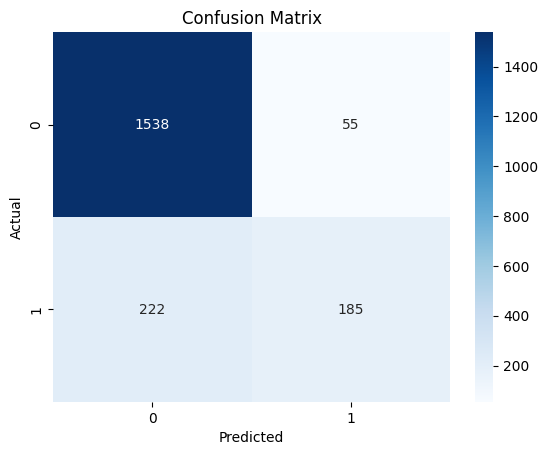

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df=pd.read_csv('Churn_Modelling.csv')
df.head()
print("Shape of data:",df.shape)
print("Missing values:\n",df.isnull().sum())
df.info()
df['Exited'].value_counts()
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)
X=df.drop('Exited',axis=1)
y=df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
